In [24]:
#Librerias basicas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## ¿Qué es Principal Component Analysis?

Básicamente, PCA es una técnica de reducción de dimensionalidad lineal (algoritmo) que transforma un conjunto de variables correlacionadas en un número más pequeño de variables no correlacionadas llamadas componentes principales, mientras retiene tanta variación de los datos originales como sea posible.

In [4]:
#Importar el conjunto de datos
dataset = pd.read_csv("iris.csv")

In [5]:
#Veamos el dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
#Preprocesamiento
X = dataset.drop('species', 1)
y = dataset['species']

In [10]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Normalizamos los datos para que PCA funcione mejor
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
#Aplicamos de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [13]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72551423, 0.23000922, 0.03960774, 0.00486882])

El primer componente principal es responsable de la varianza del 72,55%. De manera similar, el segundo componente principal causa una variación del 23% en el conjunto de datos. En conjunto, podemos decir que (72,55 + 23) el 95,55% por ciento de la información de clasificación contenida en el conjunto de características es capturada por los dos primeros componentes principales.

In [15]:
components_ = dataset.columns[0:4]

comp_df_b = pd.DataFrame(list(zip(components_,pca.explained_variance_ratio_*100)),columns=["Componentes","Contribucion"])

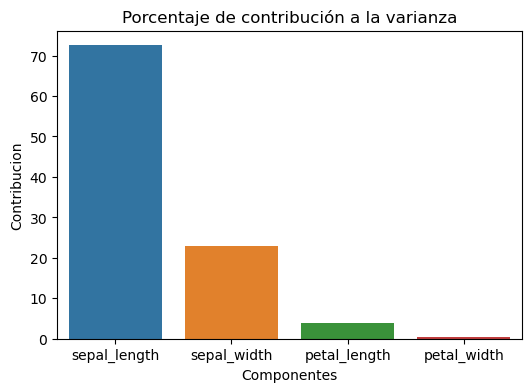

In [23]:
plt.figure(figsize=(6, 4))

sns.barplot(
    data=comp_df_b,
    x="Componentes", 
    y="Contribucion");

plt.title("Porcentaje de contribución a la varianza")
plt.show()